In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
from scipy import ndimage
import textwrap
from utils import display
plt.rcParams['figure.figsize'] = (6,6)

In [4]:
with open('lorem.txt', 'r') as f:
    text = f.read()
text

'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin pretium eros neque, a sodales mi pulvinar ut. Donec placerat malesuada efficitur? Suspendisse! Gravida euismod erat. Proin dolor nibh, efficitur at purus vel, posuere eleifend dolor. \nCras tristique feugiat erat, eget viverra urna commodo non. Sed rhoncus sapien et eros interdum vestibulum. Cras vulputate ligula eros, vel rhoncus neque pretium vel. Integer ut felis sit amet nibh viverra finibus. Pellentesque ac porttitor ante. Ut ullamcorper est malesuada neque tempor rutrum. Phasellus volutpat blandit lobortis. Vestibulum sagittis ac ex ac sodales!? Vivamus vulputate sodales velit a bibendum. \nUt malesuada porta lectus, in dignissim quam blandit eget? Cras sed tellus non metus interdum cursus id molestie magna.'

In [5]:
def text_format(text, chars_per_line):
    text = text.lower()
    
    text_to_draw = ''
    for par in text.split('\n'):
        par = textwrap.wrap(par, width=chars_per_line)
        par = '\n'.join(par)
        text_to_draw += par + '\n\n'
        
    return text_to_draw

In [6]:
print(text_format(text, 40))

lorem ipsum dolor sit amet, consectetur
adipiscing elit. proin pretium eros
neque, a sodales mi pulvinar ut. donec
placerat malesuada efficitur?
suspendisse! gravida euismod erat. proin
dolor nibh, efficitur at purus vel,
posuere eleifend dolor.

cras tristique feugiat erat, eget
viverra urna commodo non. sed rhoncus
sapien et eros interdum vestibulum. cras
vulputate ligula eros, vel rhoncus neque
pretium vel. integer ut felis sit amet
nibh viverra finibus. pellentesque ac
porttitor ante. ut ullamcorper est
malesuada neque tempor rutrum. phasellus
volutpat blandit lobortis. vestibulum
sagittis ac ex ac sodales!? vivamus
vulputate sodales velit a bibendum.

ut malesuada porta lectus, in dignissim
quam blandit eget? cras sed tellus non
metus interdum cursus id molestie magna.




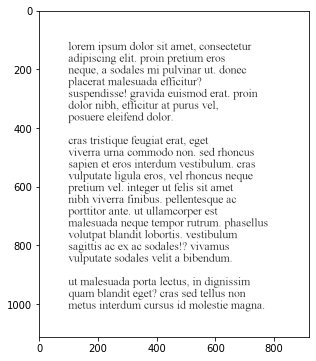

In [7]:
def draw_text(text, font="fonts/times.ttf", size=30, chars_per_line=40):
    text_to_draw = text_format(text, chars_per_line)
                     
    width_est = int(size*chars_per_line*0.45)
    heigth_est = int(size*text_to_draw.count('\n')*0.95)
    
    font = ImageFont.truetype(font, size)
    out = Image.new("P", (width_est+200, heigth_est+200), 255)
    draw = ImageDraw.Draw(out)
    draw.text((100, 100), text_to_draw, font=font)
    return np.array(out)

img = draw_text(text, size=40)
display(img)

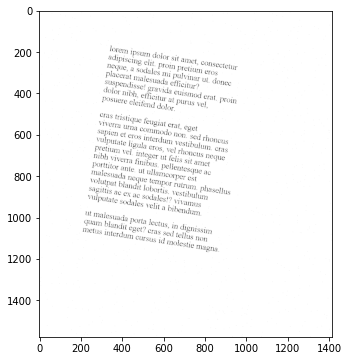

In [8]:
def shift_rotation_noise(img, angle_range=20, shift_range=300, noise_level=1):
    # shift
    shift_x, shift_y = np.random.randint(0, shift_range, size=2)
    img = cv2.copyMakeBorder(img, 
                             shift_x, shift_range - shift_x, 
                             shift_y, shift_range - shift_y,
                             cv2.BORDER_CONSTANT, value=(255,255,255))
    
    # rotation
    angle = np.random.uniform(-angle_range, angle_range)
    img = ndimage.rotate(img, angle, cval=255)
    
    # noise
    noise = np.random.normal(0, noise_level, size=img.shape).astype(np.uint8)
    img = cv2.add(img, noise)
    noise = np.random.normal(0, noise_level*0.3, size=img.shape).astype(np.uint8)
    img = cv2.subtract(img, noise)

    return img

img = shift_rotation_noise(img)
display(img)

In [9]:
for i in range(10):
    img = draw_text(text, size=np.random.randint(30,60))
    img = shift_rotation_noise(img, noise_level=0.3+i/30)
    cv2.imwrite(f'imgs/syf{i}.jpg', img) 
    